### Getting started

This notebook gives an introduction on how to install Pyaerocom and run it on your local machine. 

#### Requirements

Before installation please make sure you have all required dependencies installed ([see here for a list of dependencies](http://aerocom.met.no/pyaerocom/readme.html#requirements)).

#### Installation

Please download and unzip the [Pyaerocom GitHub repository](https://github.com/metno/pyaerocom) or clone it using 

``$ git clone https://github.com/metno/pyaerocom.git``

into a local directory of your choice. Then, navigate into the Pyaerocom root directory where the setup.py file is located. Use

``$ python setup.py install``

to install the package normally or use 

``$ python setup.py develop``

to install the package in development mode. The latter leaves the code editable and while ``install`` installs and freezes the current version of the code in your Python environment ([see here](https://packaging.python.org/tutorials/distributing-packages/#working-in-development-mode) or [here](https://stackoverflow.com/questions/19048732/python-setup-py-develop-vs-install) for more info).

If everything worked out as expected, you should be able to import pyaerocom from within a Python3 console.

In [1]:
import pyaerocom
print("Installation base directory: %s" %pyaerocom.__dir__)
print("Version: %s" %pyaerocom.__version__)

Installation base directory: /home/jonasg/github/pyaerocom/pyaerocom
Version: 0.0.1.dev1


#### Setting global environment variables

The import of data from the AEROCOM database in Pyaerocom is controlled via an instance of the `IOConfig` class.

In [2]:
print("Current config: %s" %pyaerocom.const.short_str())

Current config: Pyaerocom IOConfig
VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
ON_LOAD: <pyaerocom.config.OnLoad object at 0x7f359303a320>
TS_TYPES (list)
   [hourly
    3hourly    daily    monthly]

GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINTS_NAME: AeronetSDAV3Le

You can check if the relevant base directories `MODELBASEDIR` and `OBSBASEDIR` are valid.

In [3]:
print("All paths valid? %s" %pyaerocom.const.READY)

All paths valid? True


If you work on your local machine and use the external AEROCOM user server, you might need to change the path settings. Now you have several options to do this:

1. Change all relevant paths directly in the [paths.ini](https://github.com/metno/pyaerocom/blob/master/pyaeroco /data/paths.ini) file of your installation.
2. Create a new config file <myconfig.ini> and iniate your configuration in your Python console by calling ``pyaerocom.config = pyaerocom.IOConfig(config_file=<myconfig.ini>)``
3. Change the settings directly within the instance of the ``IOConfig`` class, as follows:

In [4]:
cfg = pyaerocom.const
cfg.MODELBASEDIR="path/that/does/not/exist"
cfg.OBSBASEDIR="path/that/does/not/exist"
print("All paths valid? %s" %cfg.READY)

All paths valid? False


See what's currently in there.

In [5]:
print("Current config: %s" %pyaerocom.const.short_str())

Current config: Pyaerocom IOConfig
VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
ON_LOAD: <pyaerocom.config.OnLoad object at 0x7f359303a320>
TS_TYPES (list)
   [hourly
    3hourly    daily    monthly]

GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINTS_NAME: AeronetSDAV3Le

As you can see, `MODELBASEDIR` and `OBSBASEDIR` contain the invalid paths, but e.g. the list containing model directories (`MODELDIRS`) still has the original settings. This is because, these are written in the method ``load_config(config_file)`` or the wrapper method ``reload()`` which does the same.  Now reload of the config_file and print.

In [6]:
cfg.reload()
print("Current config: %s" %pyaerocom.const.short_str())

Current config: Pyaerocom IOConfig
VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
ON_LOAD: <pyaerocom.config.OnLoad object at 0x7f359303a320>
TS_TYPES (list)
   [hourly
    3hourly    daily    monthly]

GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINTS_NAME: AeronetSDAV3Le

The ``reload`` (and ``load_config``) method actually checks if the currently defined base directories exist, and if not, it uses the ones that are defined in the paths.ini file. This is the why the above configuration is the intial one. If you choose valid paths, this should work.

In [7]:
cfg = pyaerocom.const
cfg.MODELBASEDIR="."
cfg.OBSBASEDIR="."
print("All paths valid? %s" %cfg.READY)
cfg.reload()
print("Current config: %s" %cfg.short_str())

All paths valid? True
Current config: Pyaerocom IOConfig
VERBOSE: True
MIN_YEAR: 0
MAX_YEAR: 3000
ON_LOAD: <pyaerocom.config.OnLoad object at 0x7f359303a320>
TS_TYPES (list)
   [hourly
    3hourly    daily    monthly]

GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
REVISION_FILE: Revision.txt
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINT

This is it! Now with everything being set up correctly, we can start analysing the data. The following tutorials focus on the reading, plotting and analysis of model data. Tutorials for observational data will follow soon, as well as tutorials that show how to merge and compare model with observational data. 

The following notebook introduces how Pyaerocom handles regions and where they can be defined. In the subsequent tutorial, the `ReadModelData` class is introduced, that can be used to import model data in a flexible way based on variable name, time range and temporal resolution. The loaded data for each model and variable is then stored in the analysis class `ModelData` which will be introduced in a later tutorial.

Now what is a tutorial without a nice image? Let's summarise in a oneliner what will be explained in the following tutorials:

Rolling longitudes to -180 -> 180 definition


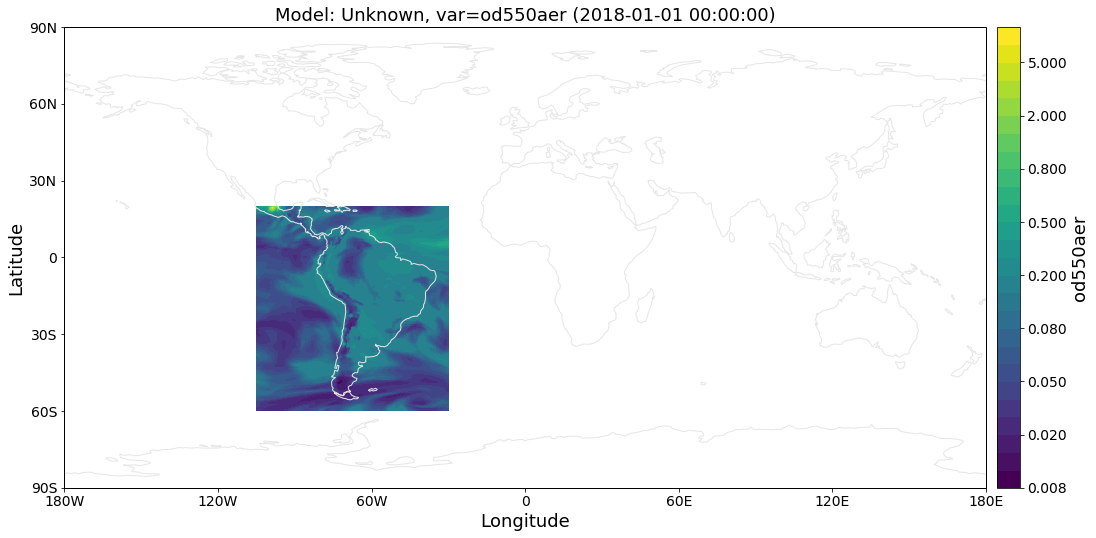

In [8]:
import pyaerocom
fig = pyaerocom.ModelData()._init_testdata_default().crop(region="SAMERICA").quickplot_map()